In [64]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Sampling

**Inferential Statistics** makes inferences about a populations by examining one or more random samples drawn from that population. But **sampling** describes the methods of taking a sample from population in appropriate way.

![Illustration of Inferential Statistics](https://datatab.net/assets/tutorial/Descriptive_statistics_and_inferential_statistics.png)

For example, there are 1,000,000 citizens in some city. I want to measure the average height in this city.

But it is very hard and time-consuming to measure every single person.

Instead of this, we can bring a sample of 1,000 people and measure their height.

To make this experiment valuable, I must take a sample in **appropriate way**. If in my sample will be only tall people, my measurements would have no sense and product wrong results.

### Sampling in Python

To get sthe sample from population, we can use `random.sample(population: list, sampleSize: int)`.

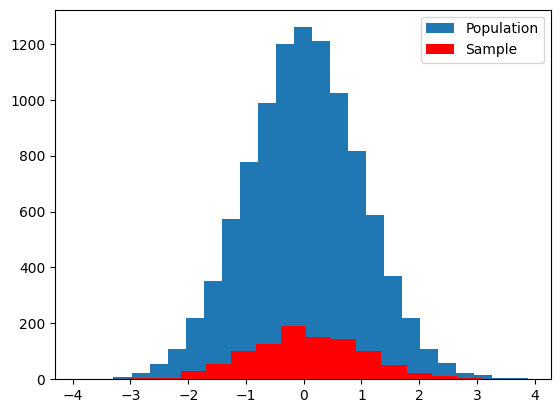

In [65]:
X = list(np.random.normal(0, 1, size = 10000))
sample = random.sample(X, 1000)

plt.hist(X, bins = 25, label = 'Population')
plt.hist(sample, bins = 15, color = 'red', label = 'Sample')
plt.legend()
plt.show()

# Effective Sampling

The common thought is to use large enough size of sample to get estimations that are very close to the population values.

For this purpose, I will conduct an experiment. I will examine the difference between the standard deviation of the population and that of the studied sample and present their difference. The goal is to investigate whether a larger sample size reduces the measurement error.
$$f(x) = \big| Std(\text{population}) - Std(\text{sample}) \big|$$

In [66]:
sample_sizes = list(range(100, 5000))

### Test for Uniform Distribution

Let $a = 0$ and $b = 100$.

In [67]:
a = 0
b = 100

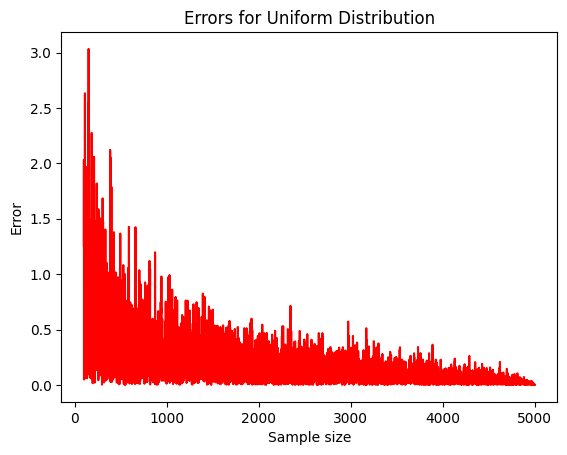

In [68]:
population = list(np.random.uniform(a, b, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Uniform Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

### Test for Normal Distribution

Let $Mean(X) = 50$ and $Std(X) = 10$.

In [69]:
mean = 50
std = 10

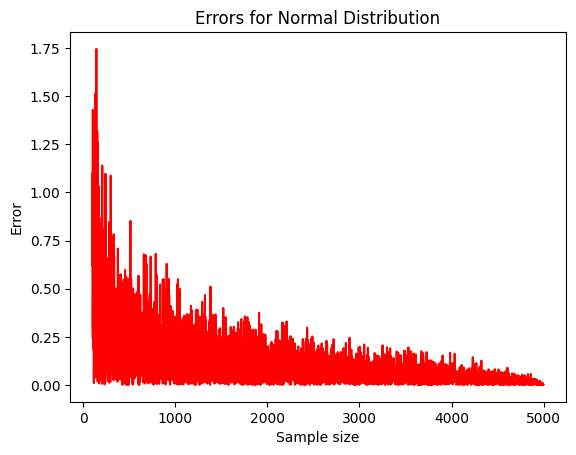

In [70]:
population = list(np.random.normal(mean, std, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Normal Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

### Test for Exponential Distribution

Let $\lambda = 0.02$

In [71]:
l = 0.02

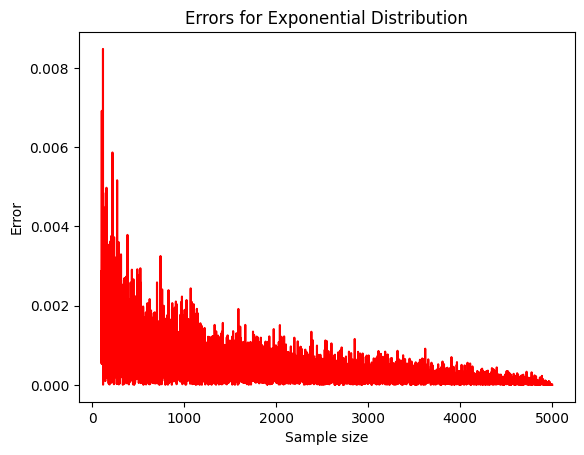

In [72]:
population = list(np.random.exponential(l, size = 5000))
population_std = lds.std(population)

results = []

for sample_size in sample_sizes:
    sample = random.sample(population, sample_size)
    sample_std = lds.std(sample)
    results.append(np.abs(population_std - sample_std))

plt.plot(sample_sizes, results, color = 'red', label = '|Std(population) - Std(sample)|')
plt.title('Errors for Exponential Distribution')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.show()

The experiment confirms that once sample reaches a reasobable size, $Std(\text{sample})$ is a pretty good approximation of $Std(\text{population})$. Moreover, it can be observed that even with a sample size of $\displaystyle \frac{1}{5}$ of the population, we already obtain a very good approximation.